In [1]:
#importing pandas library
import pandas as pd
#importing seaborn library for visualizing
import seaborn as sns
#importing train_test_split 
from sklearn.model_selection import train_test_split
#importing for feature scaling
from sklearn.preprocessing import StandardScaler
#importing RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#for saving model using loblib
import joblib

In [2]:
data = pd.read_csv("data.csv", header = None) #reading dataset

In [3]:
type(data)

pandas.core.frame.DataFrame

#### assigning the column names as mentioned on data.names

In [4]:
data.columns = ['NativeorNot','CourseInstructor','Course','SummerOrRegularSemester','ClassSize','ClassAttribute']

# EDA

In [5]:
data.head() #to check overview of dataset

NativeorNot  CourseInstructor  Course  SummerOrRegularSemester  ClassSize   
0            1                23       3                        1         19  \
1            2                15       3                        1         17   
2            1                23       3                        2         49   
3            1                 5       2                        2         33   
4            2                 7      11                        2         55   

   ClassAttribute  
0               3  
1               3  
2               3  
3               3  
4               3

In [6]:
data.size

906

In [7]:
data.shape

(151, 6)

In [8]:
data.info() #to get insights like data type of attributes,column count,Non-Null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   NativeorNot              151 non-null    int64
 1   CourseInstructor         151 non-null    int64
 2   Course                   151 non-null    int64
 3   SummerOrRegularSemester  151 non-null    int64
 4   ClassSize                151 non-null    int64
 5   ClassAttribute           151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [9]:
data.isnull().any() #to check the null values

NativeorNot                False
CourseInstructor           False
Course                     False
SummerOrRegularSemester    False
ClassSize                  False
ClassAttribute             False
dtype: bool

By the obsetvation, dataset does not contain null values

In [10]:
data.describe() #to retreive statistical data from dataset

NativeorNot  CourseInstructor      Course  SummerOrRegularSemester   
count   151.000000        151.000000  151.000000               151.000000  \
mean      1.807947         13.642384    8.105960                 1.847682   
std       0.395225          6.825779    7.023914                 0.360525   
min       1.000000          1.000000    1.000000                 1.000000   
25%       2.000000          8.000000    3.000000                 2.000000   
50%       2.000000         13.000000    4.000000                 2.000000   
75%       2.000000         20.000000   15.000000                 2.000000   
max       2.000000         25.000000   26.000000                 2.000000   

        ClassSize  ClassAttribute  
count  151.000000      151.000000  
mean    27.867550        2.019868  
std     12.893758        0.820327  
min      3.000000        1.000000  
25%     19.000000        1.000000  
50%     27.000000        2.000000  
75%     37.000000        3.000000  
max     66.000000        3.000000

By the statistical data we can observe, the average students in a class are 27 members and minimum class size is 3 and maximum is 66

In [11]:
data.nunique() #to get the unique count of entities of all columns in a dataset

NativeorNot                 2
CourseInstructor           25
Course                     26
SummerOrRegularSemester     2
ClassSize                  46
ClassAttribute              3
dtype: int64

In [12]:
sns.heatmap(data.corr(),annot = True) #checking the correlation between attributes

<Axes: >

# Analysis

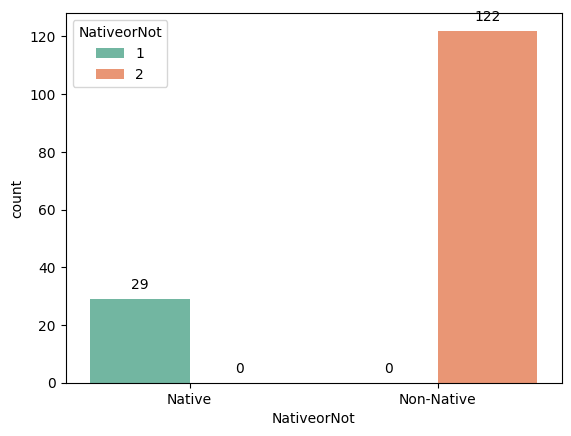

In [13]:
ax = sns.countplot(x='NativeorNot', data=data, palette='Set2', hue='NativeorNot')
ax.set_xticklabels(['Native', 'Non-Native'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [14]:
bx = sns.countplot(x='SummerOrRegularSemester', data=data, palette='Set2', hue='SummerOrRegularSemester')
bx.set_xticklabels(['Summer', 'Regular'])
for p in bx.patches:
    bx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

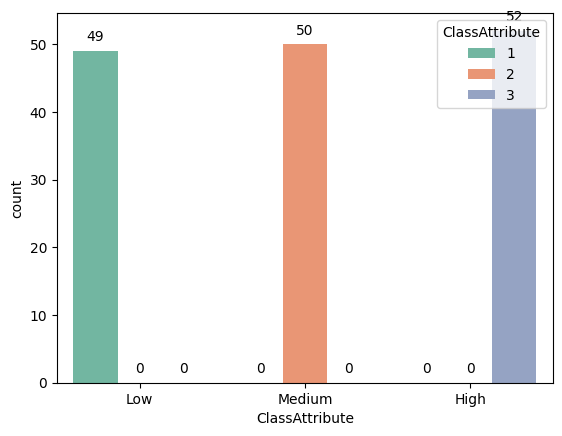

In [15]:
cx = sns.countplot(x='ClassAttribute', data=data, palette='Set2', hue='ClassAttribute')
cx.set_xticklabels(['Low', 'Medium','High'])
for p in cx.patches:
    cx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

#splitting dataset into train and test set for model building

In [24]:
X = data.drop('ClassAttribute', axis=1)
y = data['ClassAttribute']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# Instantiate the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [2, 5, 10]}

#Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Training Accuracy: 0.6095238095238096


In [29]:
#Evaluate the model on the testing set
y_pred = grid_search.predict(X_test)
print(y_pred)

[1 3 3 1 1 1 2 2 2 2 3 3 1 3 3 2 1 1 2 2 2 3 1 3 2 3 1 2 1 1 1 1 3 1 2 3 2
 2 1 1 1 3 1 2 2 3]


In [30]:
# Calculating the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Testing Accuracy:", accuracy)
print("Testing Precision:", precision)
print("Testing Recall:", recall)
print("Testing F1-score:", f1)

Testing Accuracy: 0.5869565217391305
Testing Precision: 0.5937321937321938
Testing Recall: 0.5922619047619048
Testing F1-score: 0.5872728958101595


In [31]:
#Saving the trained model to local
joblib.dump(grid_search, 'Teaching_Assistant_model.joblib')

['Teaching_Assistant_model.joblib']